In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir("D:/DataSets")

# Austo Automobiles Project

### Dataset Info

In [2]:
austo_df = pd.read_csv("austo_automobile+29+29.csv")
austo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [3]:
print("No of Rows:{}\nNo of Columns:{}".format(austo_df.shape[0],austo_df.shape[1]))

No of Rows:1581
No of Columns:14


In [4]:
austo_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


### Data Preprocessing

<b> It can be observed that there are several NULL VALUES in the dataset. Checking the dataset for any discrepant values. </b>

In [5]:
austo_cat = austo_df.select_dtypes(include='object').columns
austo_num = austo_df.select_dtypes(exclude="object").columns
for i in austo_cat:
    print("{}\n{}\n".format(i,austo_df[i].value_counts(ascending=True)))

Gender
Femal        1
Femle        1
Female     327
Male      1199
Name: Gender, dtype: int64

Profession
Business    685
Salaried    896
Name: Profession, dtype: int64

Marital_status
Single      138
Married    1443
Name: Marital_status, dtype: int64

Education
Graduate         596
Post Graduate    985
Name: Education, dtype: int64

Personal_loan
No     789
Yes    792
Name: Personal_loan, dtype: int64

House_loan
Yes     527
No     1054
Name: House_loan, dtype: int64

Partner_working
No     713
Yes    868
Name: Partner_working, dtype: int64

Make
SUV          297
Hatchback    582
Sedan        702
Name: Make, dtype: int64



<b> DISCREPANT and NULL VALUES exist in the columns Gender and Partner_salary</b>
- These values can be treated using imputation. 
- The Gender column is a categorical column hence the mode of the observations can be used for imputation.
- The Partner Salary column is a continuos column and can be calculated by subtracting the salary from total salary column.

In [6]:
austo_df["Gender"] = np.where(((austo_df["Gender"]=="Femal") | (austo_df["Gender"]=="Femle")),"Female",austo_df["Gender"])
austo_df["Gender"] = austo_df["Gender"].replace(np.nan,austo_df["Gender"].mode()[0])
austo_df["Partner_salary"] = austo_df["Total_salary"] - austo_df["Salary"]

<b> Checking the datset for OUTLIERS using boxplots </b>
- Defining a function in order to create BoxPlots to determine the outliers in the continous variables

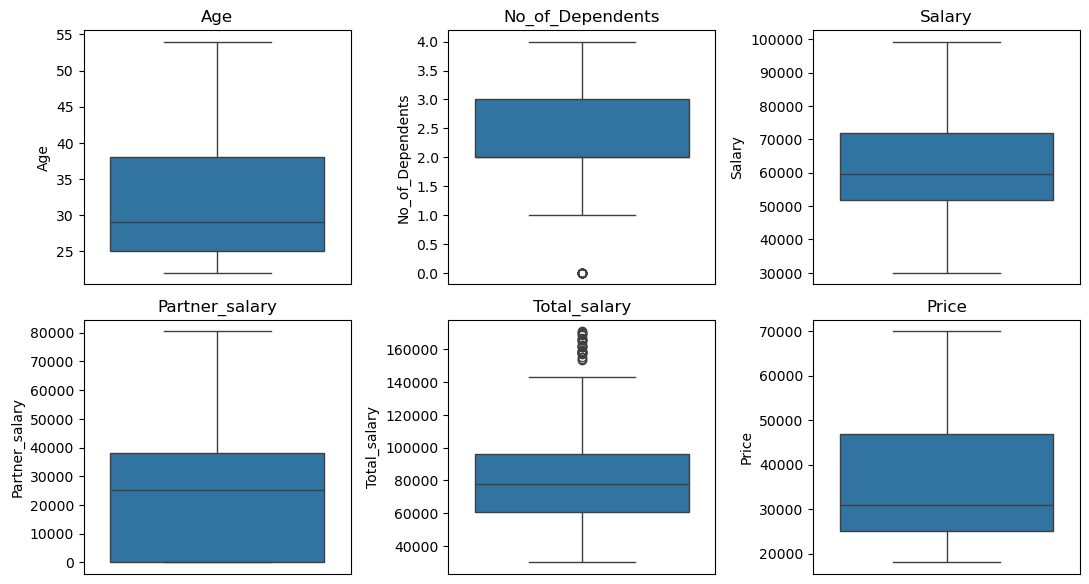

In [7]:
def CreateBoxPlots():
    col = len(austo_num)
    plt.figure(figsize=(11,6))
    for i in range(0,col):
        plt.subplot(2,3,i+1)
        plt.title("{}".format(austo_num[i]))
        sns.boxplot(austo_df[austo_num[i]])
        plt.xticks([])
    plt.tight_layout()
CreateBoxPlots()

In [8]:
austo_df[austo_df["Total_salary"]>140000]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300,142800,61000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500,140300,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600,165700,64000,SUV
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300,162900,58000,SUV
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600,159000,54000,SUV
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700,169000,61000,SUV
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700,165600,67000,SUV


- Several outliers can be observed in the Total_salary column. 
- These can be imputed with the IQR method. 
- It can be noted that the No. of Dependents column also has an outlier however we will not be treating it because this column can be treated as a categorical variable due to fewer levels of variables and imputing such values may not provide us with the appropriate data insights. Hence we can convert this into an object datatype

In [9]:
austo_df["No_of_Dependents"] = austo_df["No_of_Dependents"].astype("object")
austo_cat = austo_df.select_dtypes(include='object').columns
austo_num = austo_df.select_dtypes(exclude="object").columns
austo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   object
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(5), object(9)
memory usage: 173.1+ KB


In [10]:
Q1,Q3 = np.quantile(austo_df["Total_salary"],(0.25,0.75))
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
austo_df["Total_salary"] = np.where(austo_df["Total_salary"]>upper,upper,austo_df["Total_salary"])
austo_df["Total_salary"] = np.where(austo_df["Total_salary"]<lower,lower,austo_df["Total_salary"])

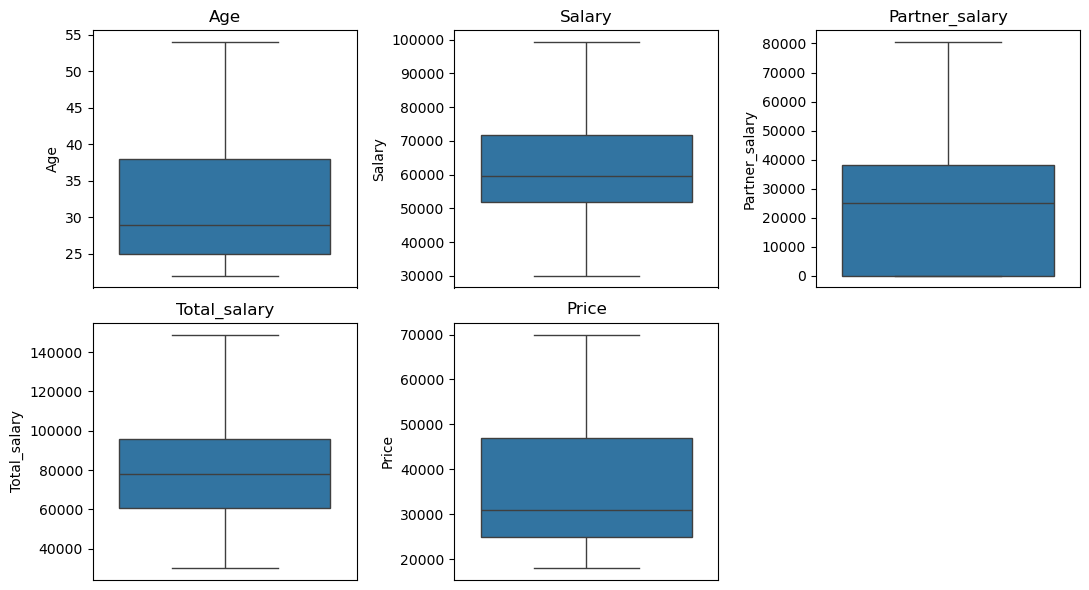

In [11]:
CreateBoxPlots()

In [12]:
austo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   int64  
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 173.1+ KB


### Univariate Analysis

#### 1. Numeric Variables

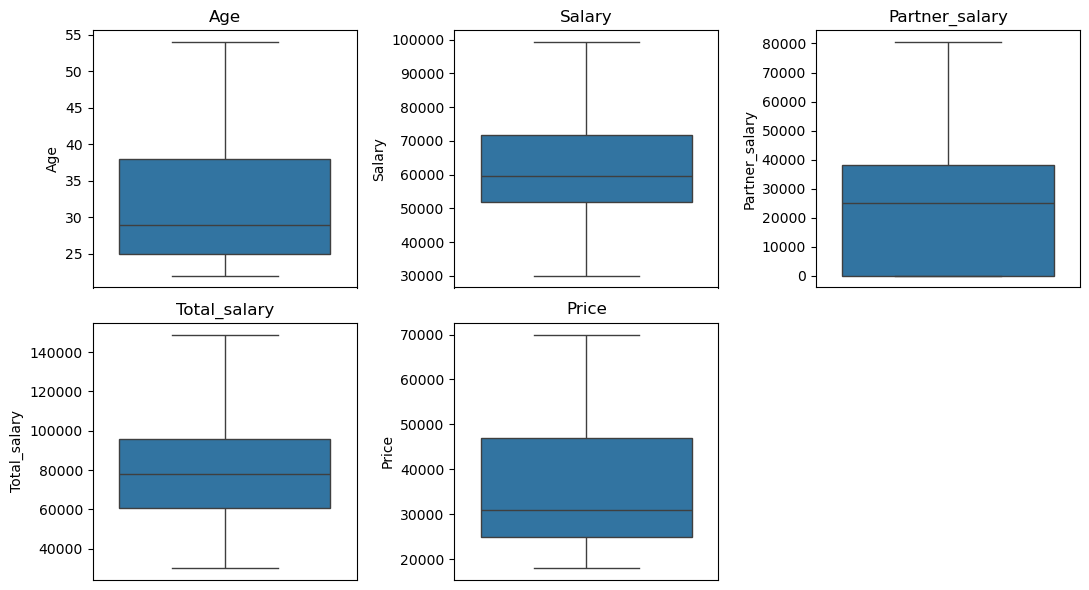

In [13]:
CreateBoxPlots()

In [14]:
austo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79398.545225,24849.147996,30000.0,60500.0,78000.0,95900.0,149000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


#### 2. Categorical Variables

In [15]:
austo_cat

Index(['Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Make'],
      dtype='object')

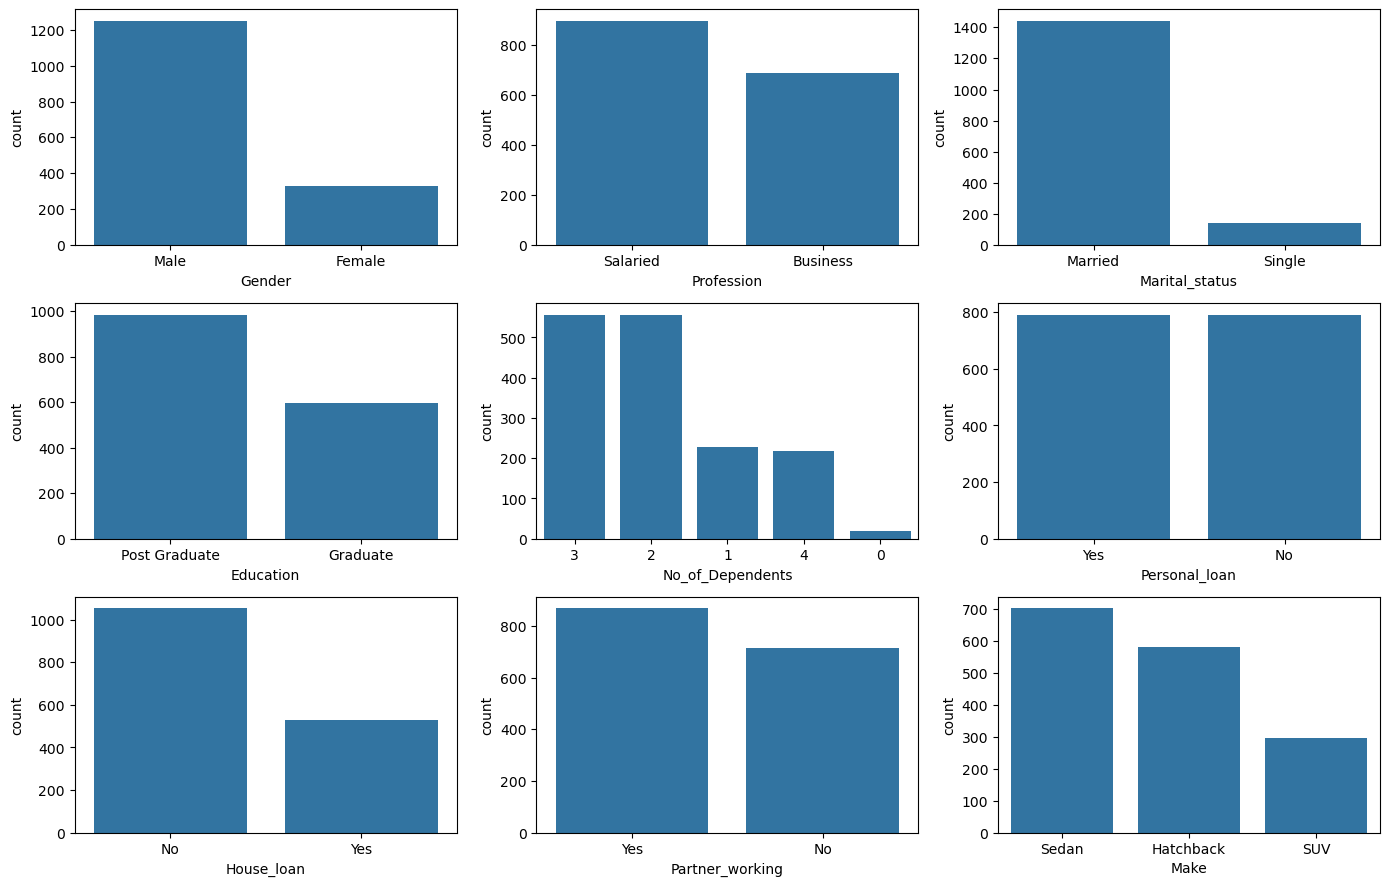

In [16]:
def CreateCountPlots():
    col = len(austo_cat)
    plt.figure(figsize=(14,9))
    for i in range(0,col):
        plt.subplot(3,3,i+1)
        sns.countplot(x=austo_df[austo_cat[i]],order=austo_df[austo_cat[i]].value_counts(ascending=False).index)
    plt.tight_layout()
CreateCountPlots()

In [17]:
for i in austo_cat:
    print("{}\n{}\n".format(i,austo_df[i].value_counts().sort_values(ascending=False)))

Gender
Male      1252
Female     329
Name: Gender, dtype: int64

Profession
Salaried    896
Business    685
Name: Profession, dtype: int64

Marital_status
Married    1443
Single      138
Name: Marital_status, dtype: int64

Education
Post Graduate    985
Graduate         596
Name: Education, dtype: int64

No_of_Dependents
3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

Personal_loan
Yes    792
No     789
Name: Personal_loan, dtype: int64

House_loan
No     1054
Yes     527
Name: House_loan, dtype: int64

Partner_working
Yes    868
No     713
Name: Partner_working, dtype: int64

Make
Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64



### Bivariate Analysis

##### 1. Numeric - Numeric Variables

In [18]:
austo_num1 = austo_num[austo_num!="Price"]
austo_num1

Index(['Age', 'Salary', 'Partner_salary', 'Total_salary'], dtype='object')

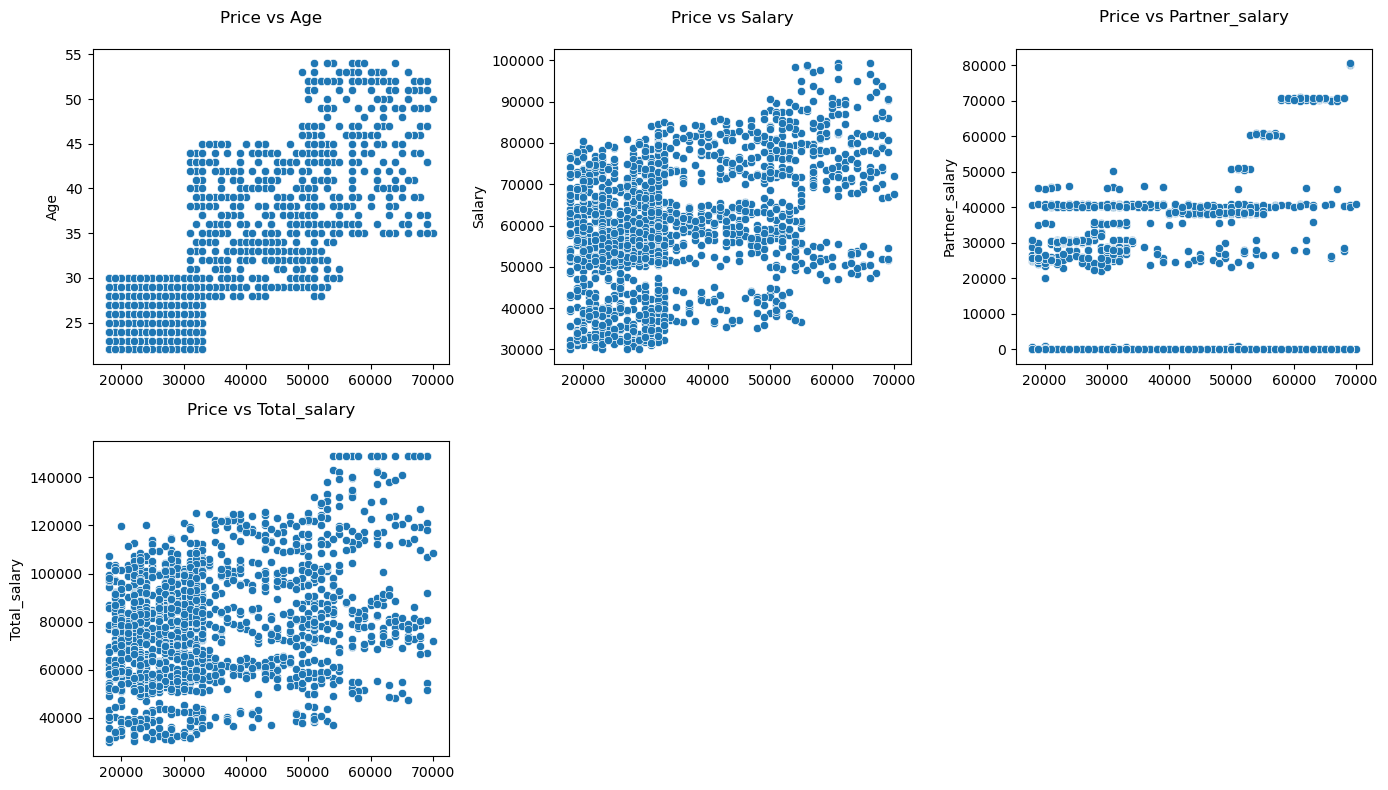

In [19]:
def CreatePriceScatterPlots():
    col = len(austo_num1)
    plt.figure(figsize=(14,8))
    for i in range(0,col):
        plt.subplot(2,3,i+1)
        plt.title("Price vs {}\n".format(austo_num1[i]))
        sns.scatterplot(austo_df,y=austo_df[austo_num1[i]],x="Price")
        plt.xlabel(None)
    plt.tight_layout()
CreatePriceScatterPlots()

In [20]:
austo_num

Index(['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price'], dtype='object')

##### 2. Categoric - Categoric Variables

In [21]:
austo_cat

Index(['Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Make'],
      dtype='object')

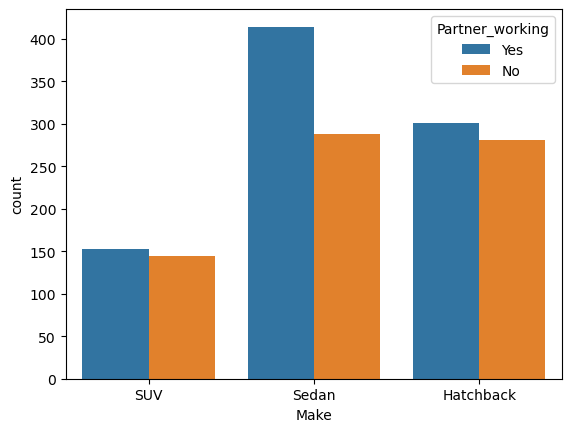

In [22]:
sns.countplot(austo_df,x="Make",hue="Partner_working");

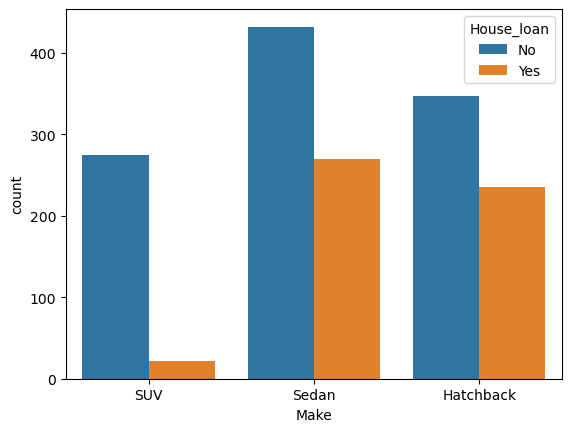

In [23]:
sns.countplot(austo_df,x="Make",hue="House_loan");

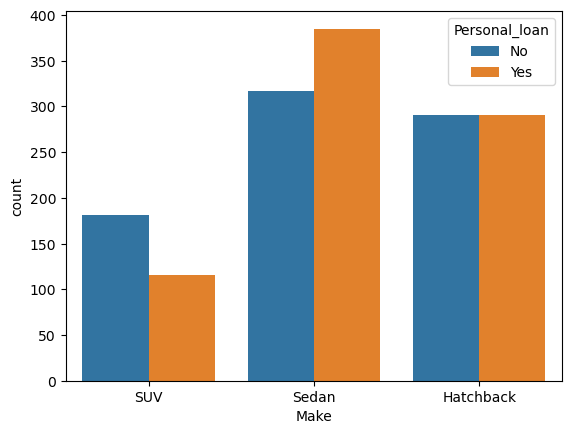

In [24]:
sns.countplot(austo_df,x="Make",hue="Personal_loan");

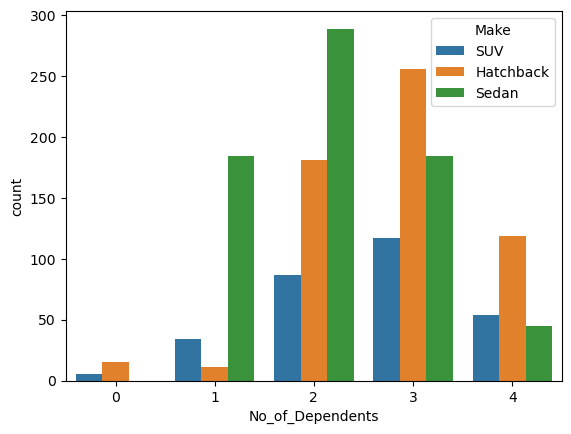

In [25]:
sns.countplot(austo_df,hue="Make",x="No_of_Dependents");

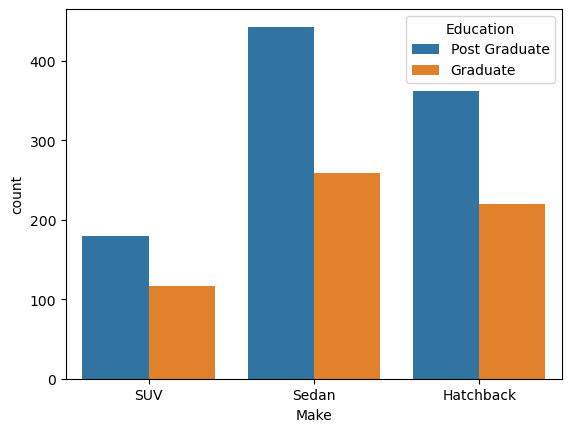

In [26]:
sns.countplot(austo_df,x="Make",hue="Education");

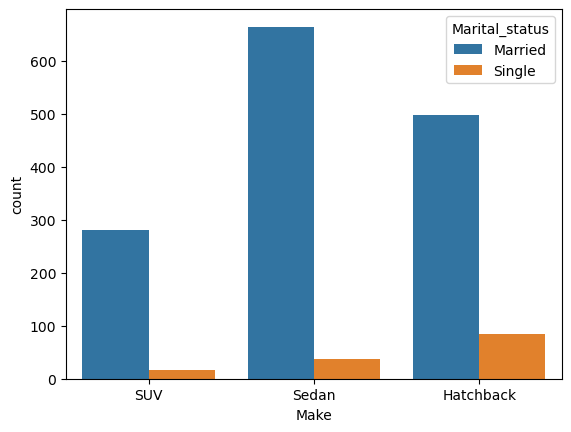

In [27]:
sns.countplot(austo_df,x="Make",hue="Marital_status");

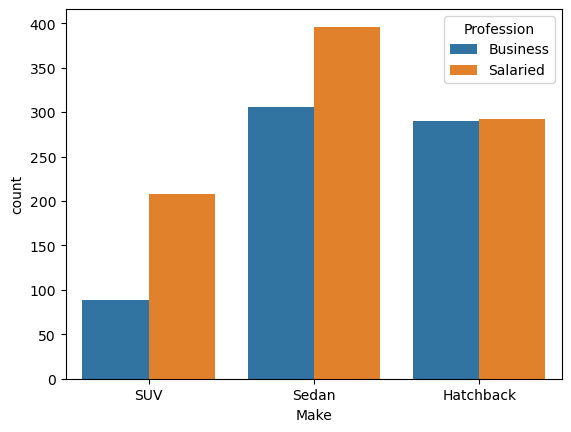

In [28]:
sns.countplot(austo_df,x="Make",hue="Profession");

###  Employee Observations
E1) Men prefer SUV compared to women by a large margin 

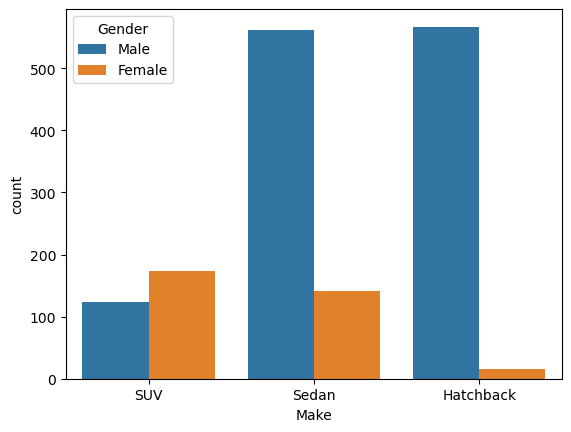

In [29]:
sns.countplot(austo_df,x="Make",hue="Gender");

E2) A salaried person is more likely to buy a Sedan

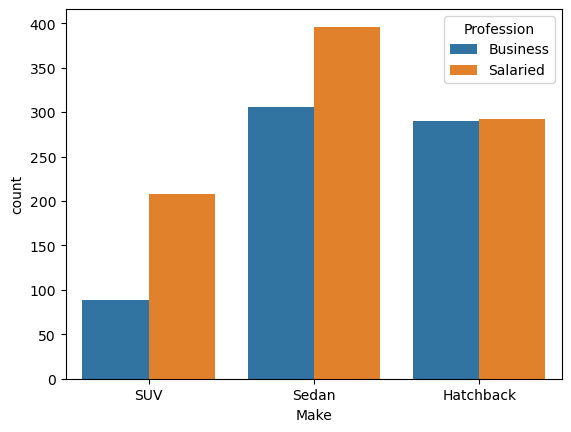

In [30]:
sns.countplot(austo_df,x="Make",hue="Profession");

E3) A salaried male is an easier target for an SUV sale over a Sedan Sale

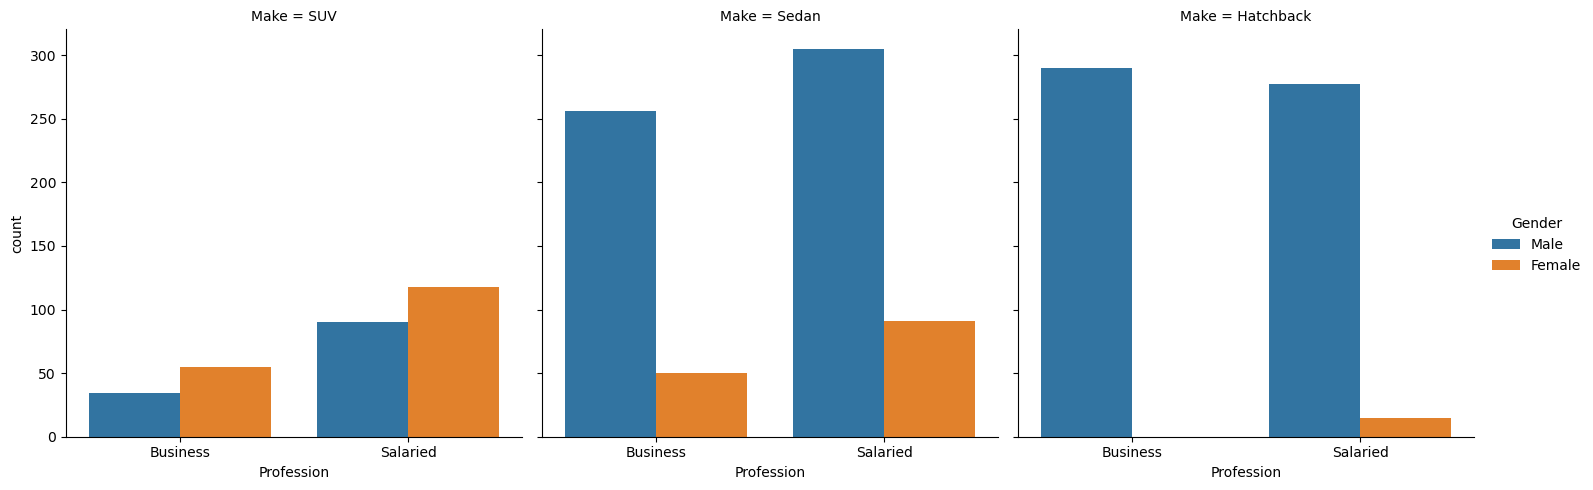

In [31]:
sns.catplot(austo_df,x="Profession",hue="Gender",col="Make",kind="count",order=austo_df["Profession"].value_counts(ascending=True).index)
plt.show()

### Amount Spent on Automobiles

Gender

In [32]:
austo_df["Gender"].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [33]:
austo_df.groupby("Gender")["Price"].sum()

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64

In [34]:
female_revenue = austo_df.groupby("Gender")["Price"].sum().sort_values(ascending=True)[0]
male_revenue = austo_df.groupby("Gender")["Price"].sum().sort_values(ascending=True)[1]
male_revenue_percentage = male_revenue/austo_df["Price"].sum()
female_revenue_percentage = female_revenue/austo_df["Price"].sum()
print("Female revenue percentage: {}%\nMale revenue percentage: {}%".format(female_revenue_percentage*100,male_revenue_percentage*100))

Female revenue percentage: 27.88734896943852%
Male revenue percentage: 72.11265103056148%


<Axes: xlabel='Price', ylabel='Density'>

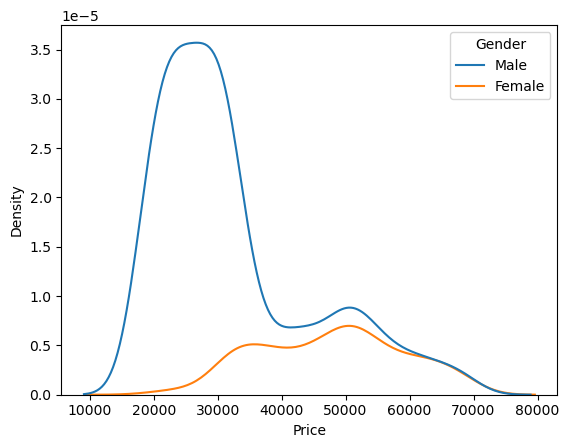

In [35]:
sns.kdeplot(austo_df,x="Price",hue="Gender")

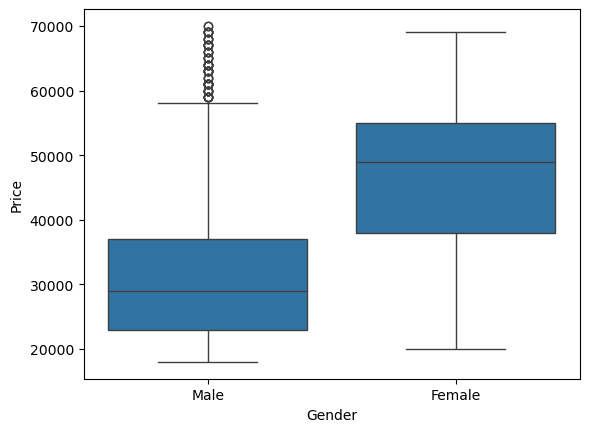

In [36]:
sns.boxplot(austo_df,x="Gender",y="Price");

In [37]:
austo_df.groupby("Gender")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0
Male,1252.0,32416.134185,12366.253107,18000.0,23000.0,29000.0,37000.0,70000.0


F2) Personal_loan

In [38]:
austo_df.Personal_loan.value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [39]:
austo_df.groupby("Personal_loan")["Price"].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [40]:
nopers_revenue = austo_df.groupby("Personal_loan")["Price"].sum().sort_values(ascending=False)[0]
pers_revenue = austo_df.groupby("Personal_loan")["Price"].sum().sort_values(ascending=False)[1]
nopers_revenue_percentage = nopers_revenue/austo_df["Price"].sum()
pers_revenue_percentage = pers_revenue/austo_df["Price"].sum()
print("Personal loan percentage: {}%\nNo personal loan percentage: {}%".format(round(pers_revenue_percentage*100,ndigits=2),round(nopers_revenue_percentage*100,ndigits=2)))

Personal loan percentage: 48.49%
No personal loan percentage: 51.51%


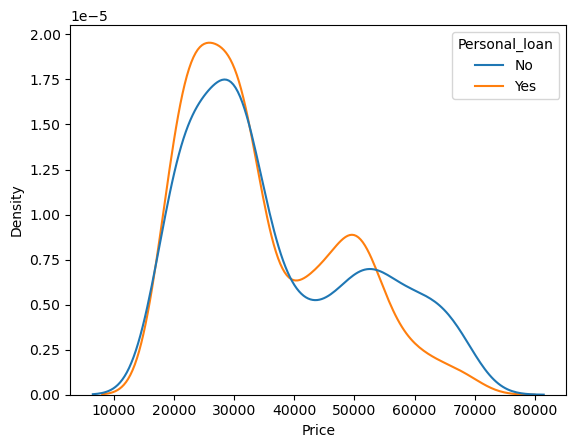

In [41]:
sns.kdeplot(austo_df,hue="Personal_loan",x="Price");

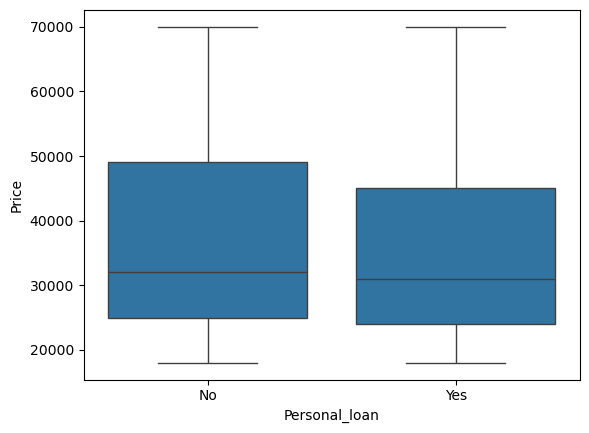

In [42]:
sns.boxplot(austo_df,x="Personal_loan",y="Price");

In [43]:
austo_df.groupby("Personal_loan")["Price"].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [44]:
austo_df.groupby("Personal_loan")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


### Impact of having a working partner upon the price of a vehicle

In [45]:
austo_df.value_counts("Partner_working")

Partner_working
Yes    868
No     713
dtype: int64

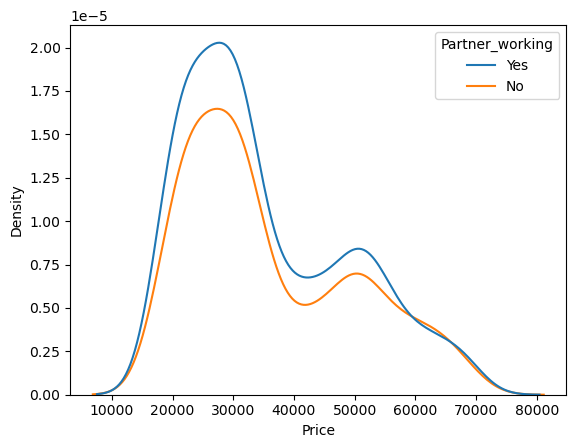

In [46]:
sns.kdeplot(austo_df,hue="Partner_working",x="Price");

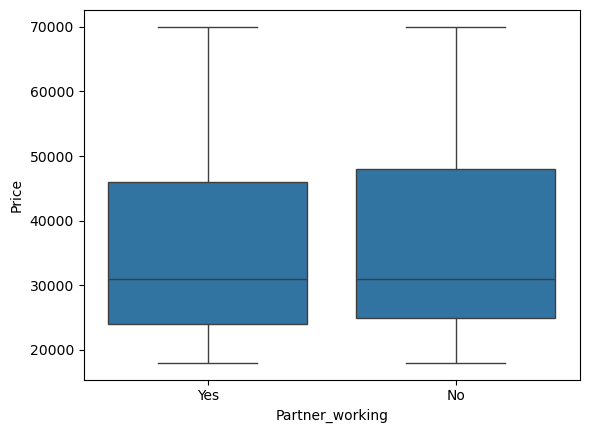

In [47]:
sns.boxplot(austo_df,x="Partner_working",y="Price");

In [48]:
austo_df.groupby("Partner_working")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.0,36000.000000,13817.734086,18000.0,25000.0,31000.0,48000.0,70000.0
Yes,868.0,35267.281106,13479.532555,18000.0,24000.0,31000.0,46000.0,70000.0


In [49]:
austo_df.groupby("Partner_working")["Price"].sum()

Partner_working
No     25668000
Yes    30612000
Name: Price, dtype: int64

In [50]:
price_working = austo_df.groupby("Partner_working")["Price"].sum().sort_values(ascending=False)
price_working[0] - price_working[1]

4944000

### Marketing Strategy on the basis of Gender and Marital Status of people

In [51]:
austo_num

Index(['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price'], dtype='object')

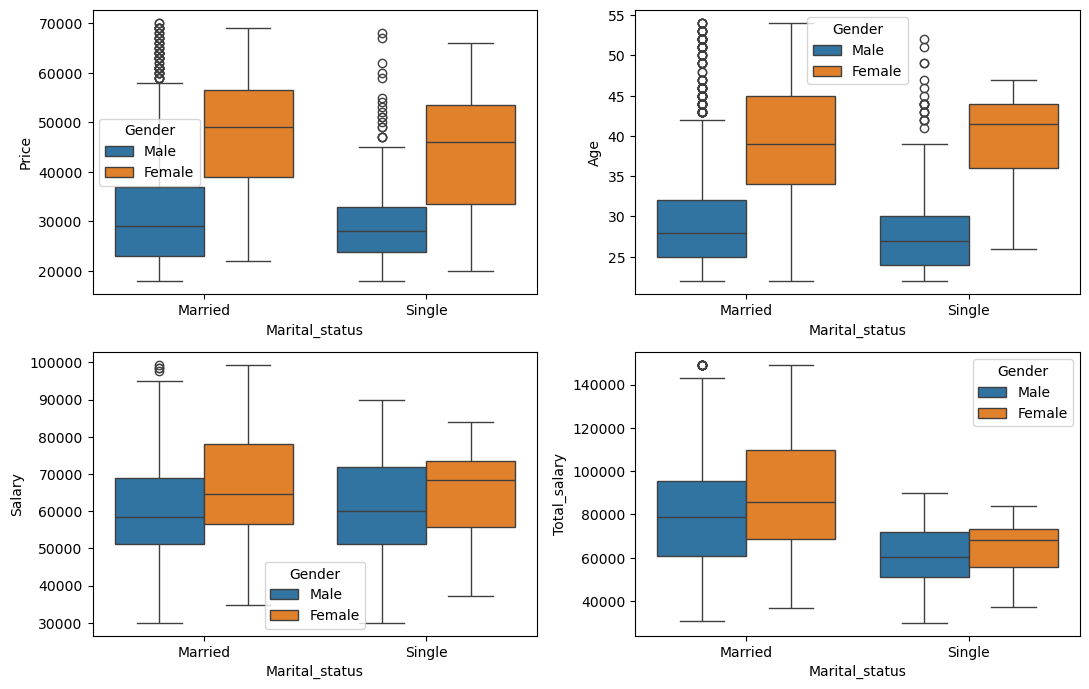

In [52]:
fig, axes = plt.subplots(2,2,figsize=(11,7))
sns.boxplot(austo_df,x="Marital_status",y="Price",hue="Gender",ax=axes[0][0]);
sns.boxplot(austo_df,x="Marital_status",y="Age",hue="Gender",ax=axes[0][1]);
sns.boxplot(austo_df,x="Marital_status",y="Salary",hue="Gender",ax=axes[1][0]);
sns.boxplot(austo_df,x="Marital_status",y="Total_salary",hue="Gender",ax=axes[1][1]);
plt.tight_layout()

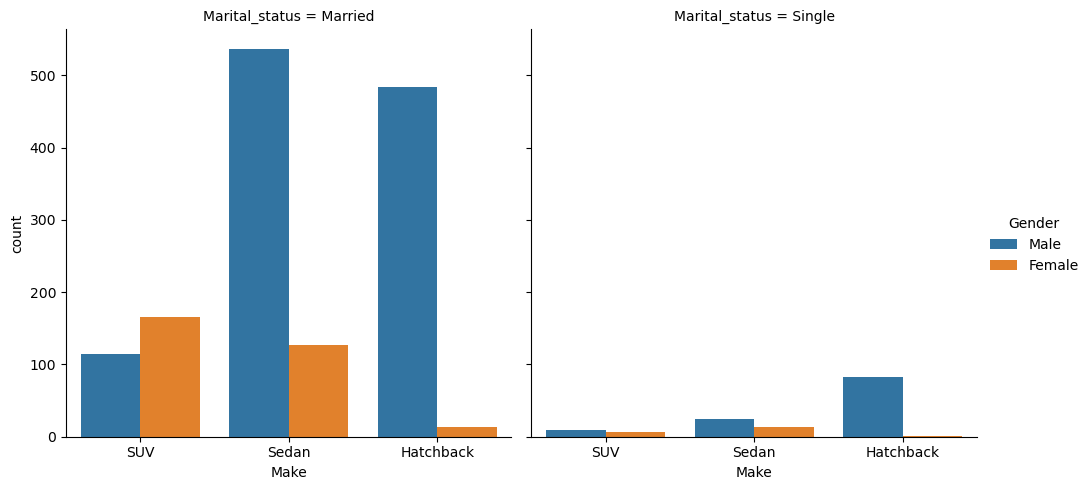

In [53]:
sns.catplot(austo_df,x="Make",hue="Gender",col="Marital_status",kind="count");

### END OF PROJECT 